# Draw global and regional maps

In [3]:
from pathlib import Path
import sys
import os
import shutil
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import gsw
from IPython.display import display,Image

from importlib import reload
import meop
import meop_metadata
import meop_plot_data
import meop_filenames

## Load metadata

In [4]:
# load metadata for public data
rebuild = False # if True, rebuild the database of metadata from netcdf files
public = True # keep only public profiles
Tdata = True # keep only profiles with valid temperature data
lprofiles, ltags, ldeployments = meop_metadata.read_lists_metadata(rebuild=rebuild,public=public,Tdata=Tdata)

# Regional maps

## Map for a single deployment

(<Figure size 1080x1080 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f8e26bb8150>)

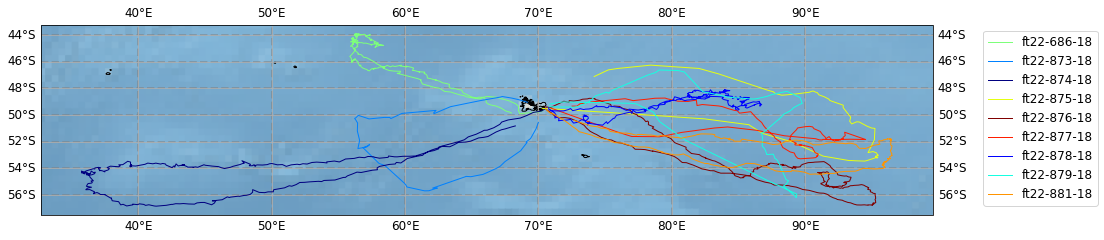

In [27]:
meop_plot_data.plot_map_deployments(lprofiles[lprofiles.DEPLOYMENT_CODE=='ft22'])

## Map for a subset of tags based on location and year

(<Figure size 1080x1080 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f8e1c6faa10>)

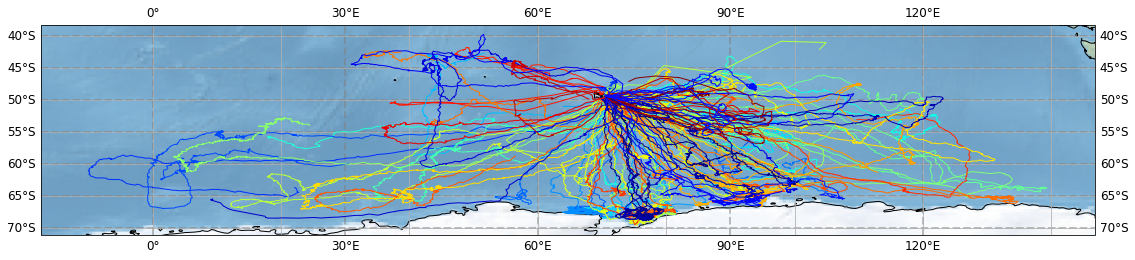

In [19]:
# select tags with at least one profiles satisfying a given criterion
def select_tags(lprofiles,select):
    df = lprofiles[select]
    lprofiles = lprofiles[lprofiles.SMRU_PLATFORM_CODE.isin(df.SMRU_PLATFORM_CODE)]
    return lprofiles

select = (lprofiles.year.isin([2018,2019])) & (lprofiles.LONGITUDE>0) & (lprofiles.LONGITUDE<125) & (lprofiles.LATITUDE<0)
meop_plot_data.plot_map_deployments(select_tags(lprofiles,select),legend=False)

## Map tracks for tags with full resolution available only

(<Figure size 1080x1080 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f8e1cdeb2d0>)

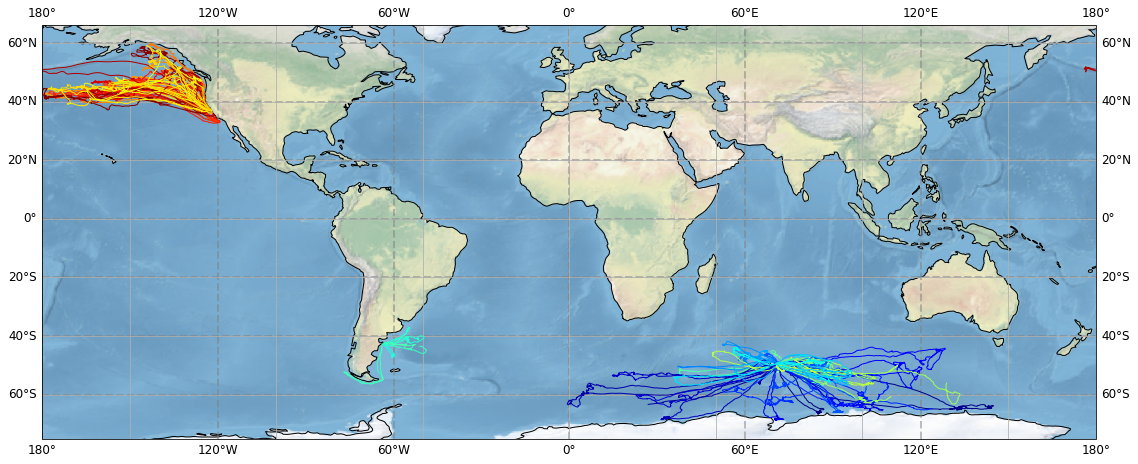

In [28]:
lprof_fr1, ltags_fr1, ldepl_fr1 = meop_metadata.read_lists_metadata(public=True,Tdata=True,qf='fr1')
meop_plot_data.plot_map_deployments(lprof_fr1,legend=False)

# Global maps

(<Figure size 1080x1080 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f0318808610>)

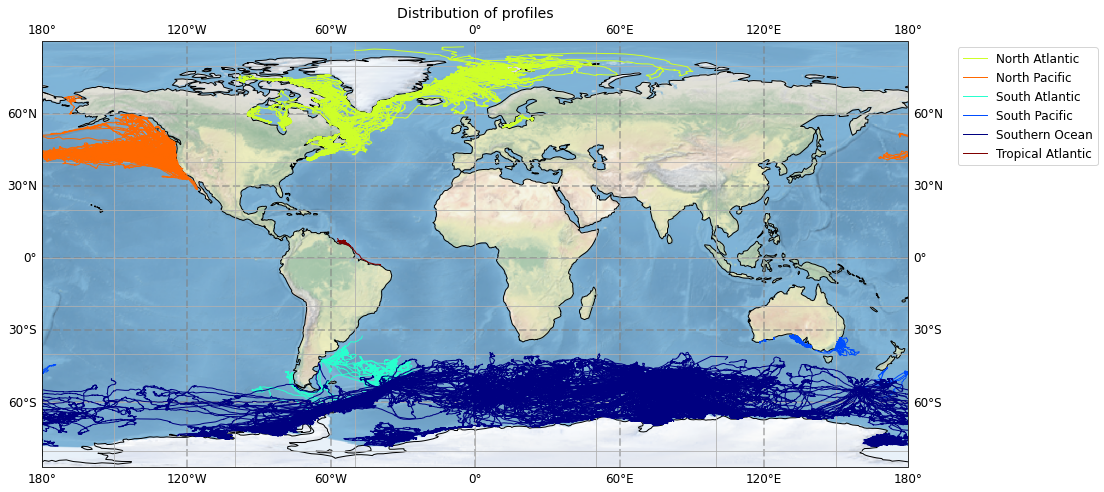

In [5]:
meop_plot_data.plot_map_deployments(lprofiles,
                          groupby='MASK',
                          title=f'Distribution of profiles',
                          legend=True,
                          namefig='Global_distribution_by_regions.png',
                          folder=meop_filenames.processdir,
                         )

(<Figure size 1080x1080 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f8e1c2e9ed0>)

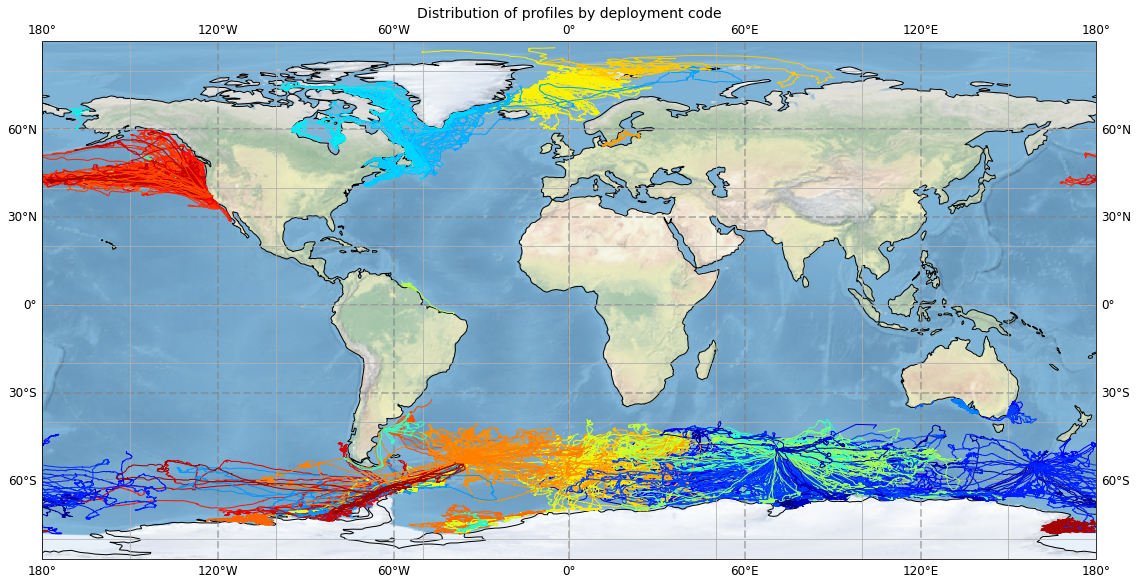

In [22]:
meop_plot_data.plot_map_deployments(lprofiles,
                          groupby='DEPLOYMENT_CODE',
                          title=f'Distribution of profiles by deployment code',
                          legend=False,
                          namefig='Global_distribution_by_deployment.png',
                          folder=meop_filenames.processdir,
                         )

(<Figure size 1080x1080 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f8e19964f10>)

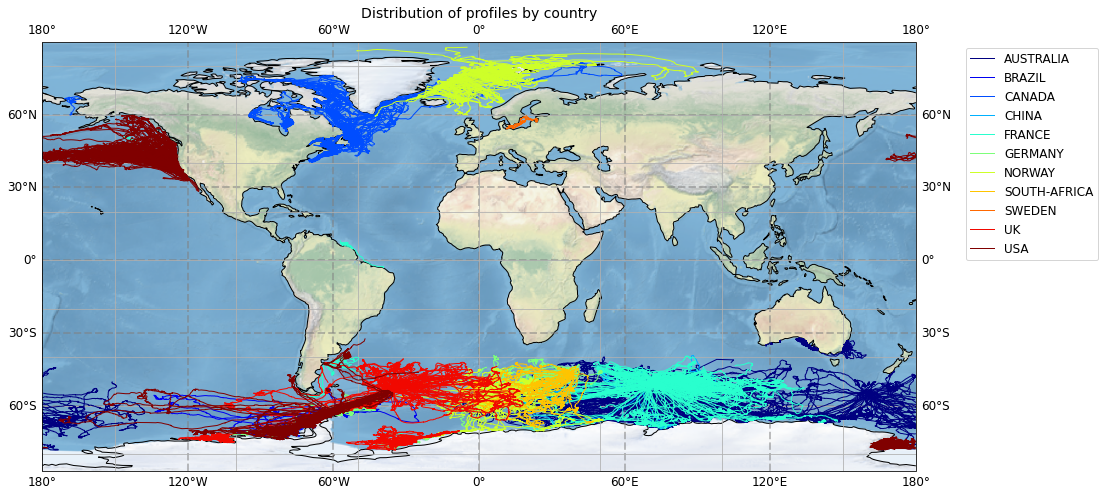

In [23]:
if 'COUNTRY' not in lprofiles:
    lprofiles = lprofiles.merge(ldeployments[['DEPLOYMENT_CODE','COUNTRY']],on='DEPLOYMENT_CODE',right_index=False,)
meop_plot_data.plot_map_deployments(lprofiles,
                          groupby='COUNTRY',
                          title=f'Distribution of profiles by country',
                          legend=True,
                          namefig='Global_distribution_by_country.png',
                          folder=meop_filenames.processdir,
                         )

# Maps by region

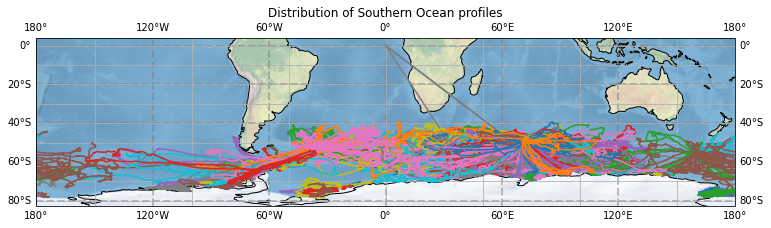

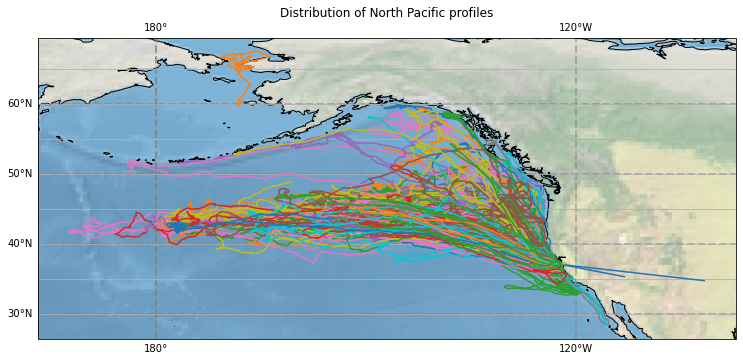

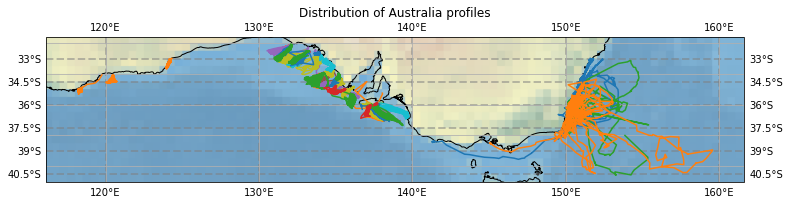

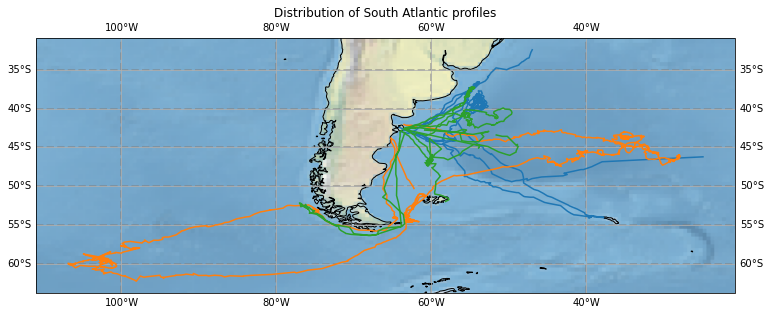

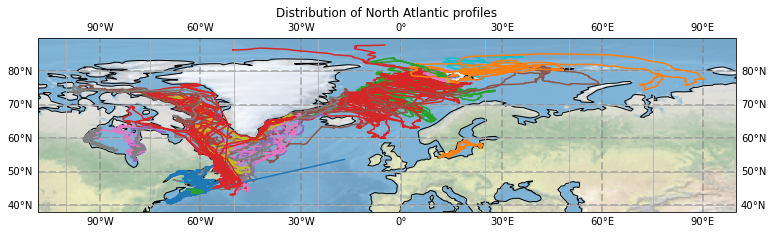

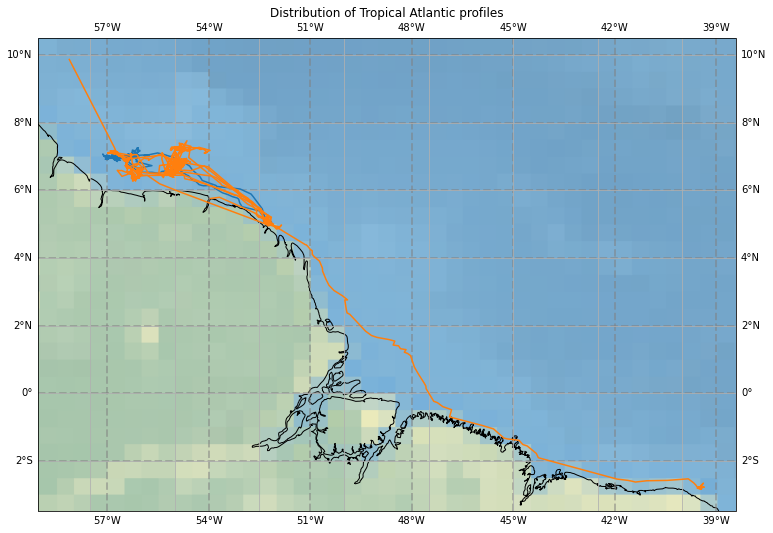

In [29]:
for region in list_tags.MASK.unique():
    index_tags = list_tags[list_tags.MASK==region].SMRU_PLATFORM_CODE
    meop_plot_data.plot_map_deployments(list_profiles[list_profiles.SMRU_PLATFORM_CODE.isin(index_tags)],
                              groupby='DEPLOYMENT_CODE',
                              title=f'Distribution of {region} profiles',
                              legend=False,
                              namefig=f'Regional_distribution_{region}.png',
                              folder=meop_filenames.processdir,
                             )

In [37]:
list_tags.columns

Index(['SMRU_PLATFORM_CODE', 'DEPLOYMENT_CODE', 'JULD', 'LATITUDE',
       'LONGITUDE', 'N_PROF_TEMP', 'N_PROF_PSAL', 'N_PROF_CHLA', 'PUBLIC',
       'T1', 'T2', 'S1', 'S2', 'remove', 'Sremove', 'comment',
       'variable_offset', 'instr_id', 'year', 'period', 'continuous', 'prefix',
       'MASK'],
      dtype='object')

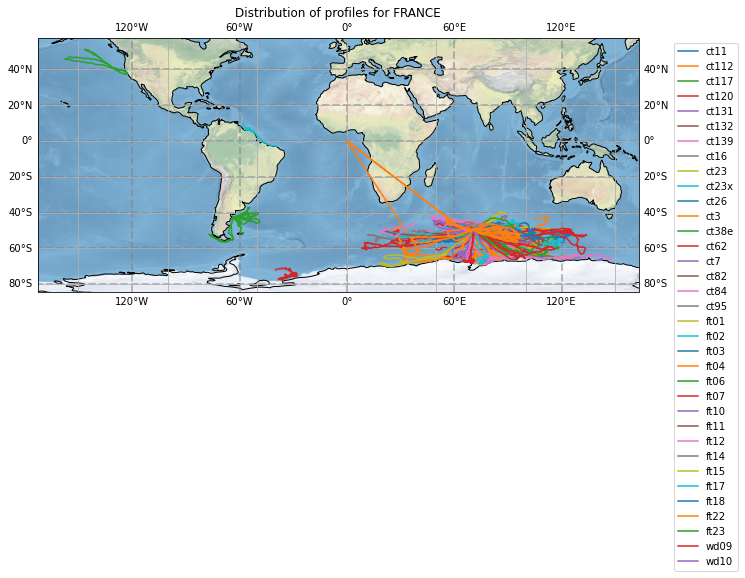

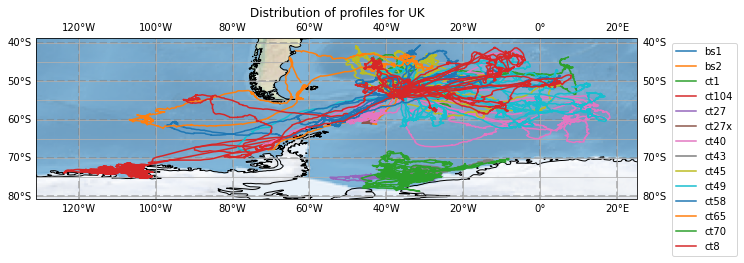

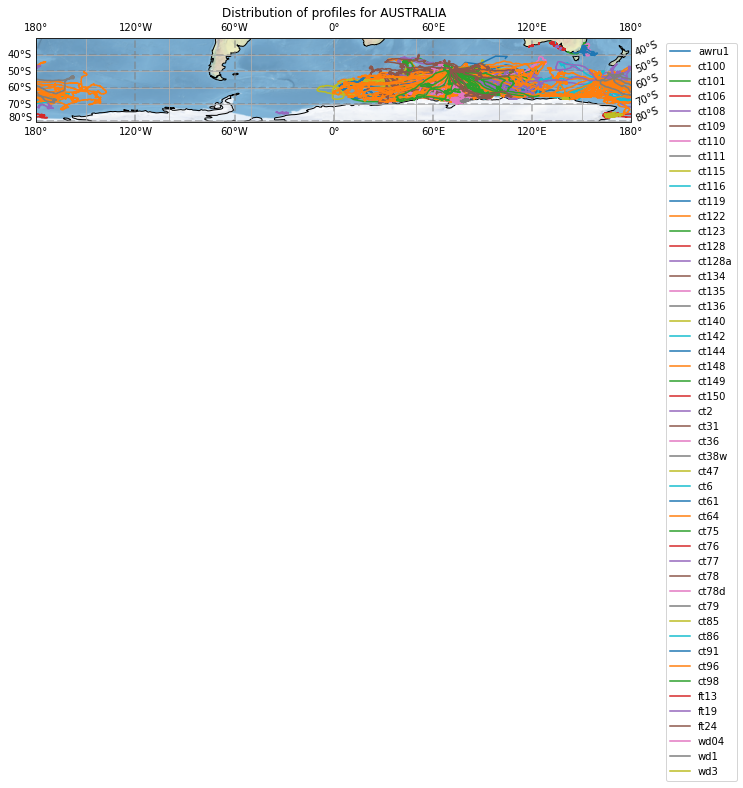

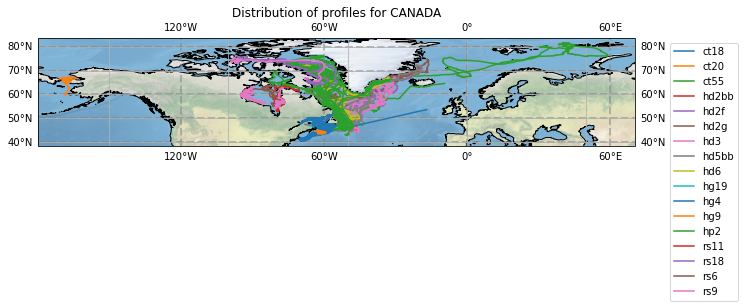

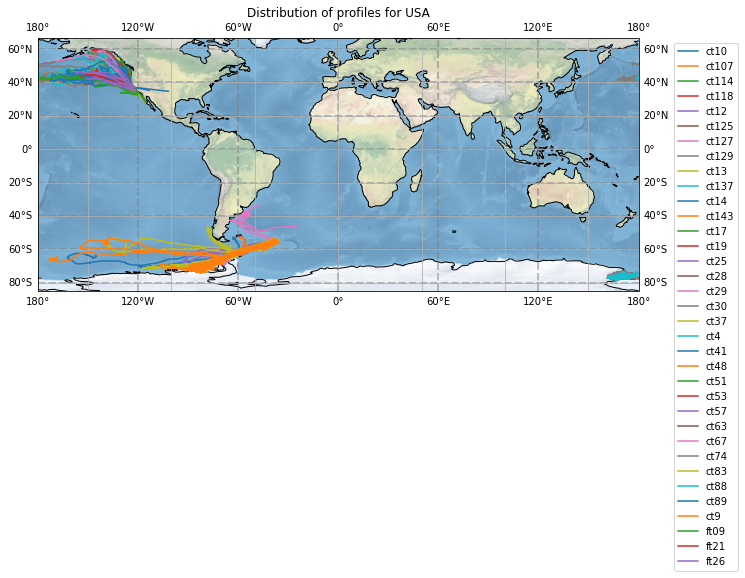

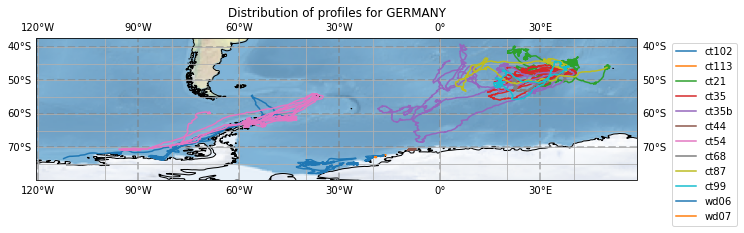

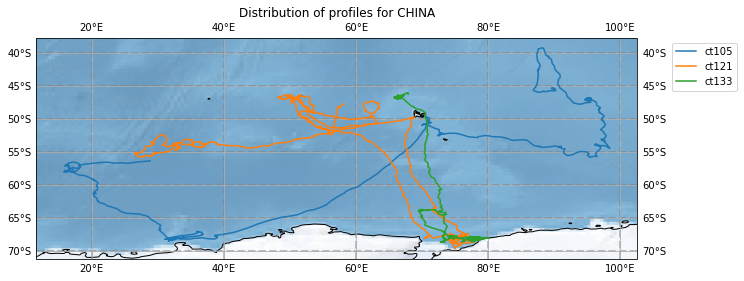

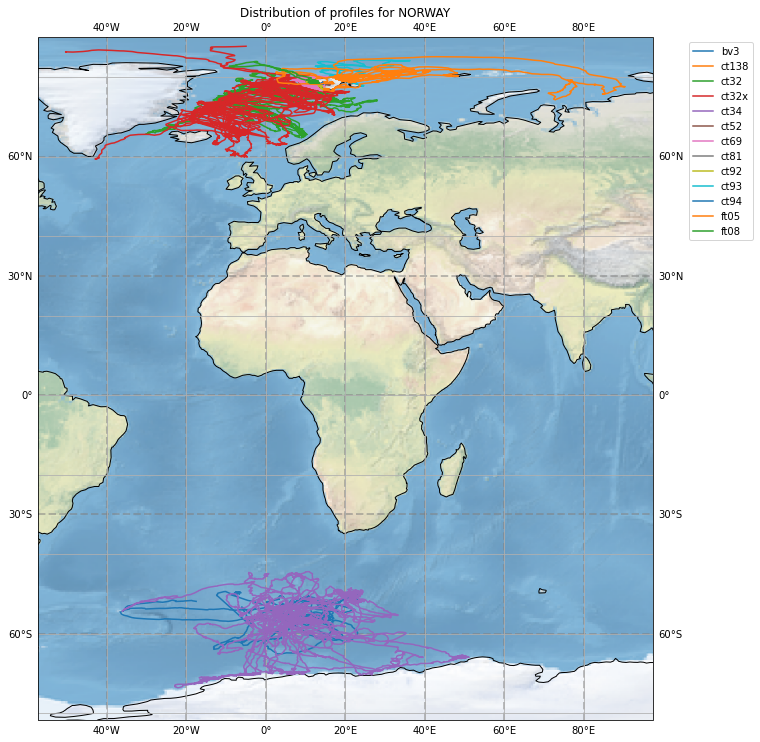

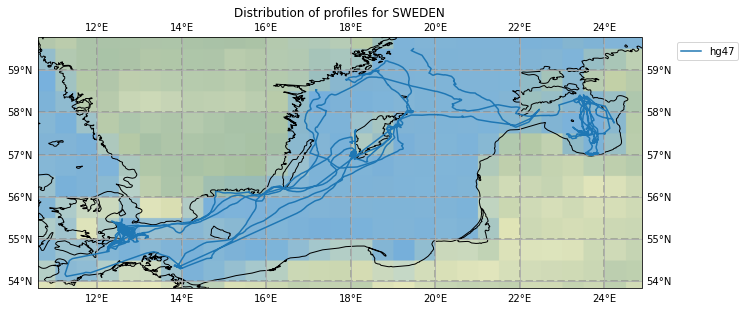

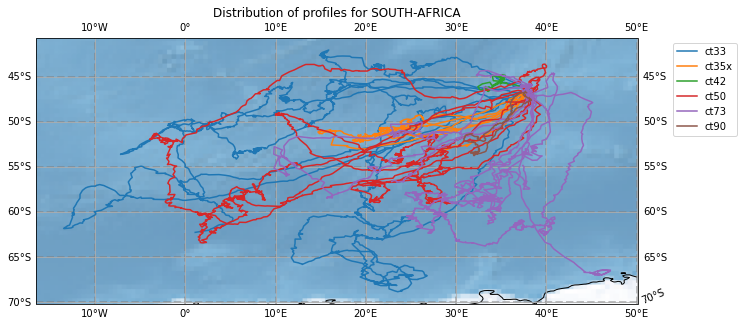

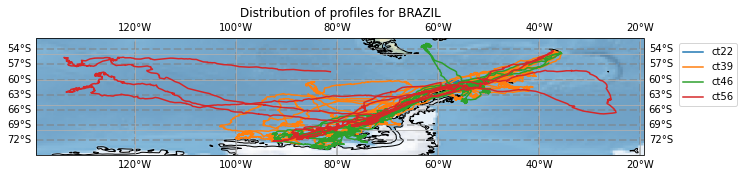

In [38]:
df_country = list_deployments[['DEPLOYMENT_CODE','COUNTRY']]
list_profiles_countries = list_profiles.merge(df_country,on='DEPLOYMENT_CODE')
for country in list_profiles_countries.COUNTRY.unique():
    list_profiles_country = list_profiles_countries[list_profiles_countries.COUNTRY==country]
    meop_plot_data.plot_map_deployments(list_profiles_country,
                              groupby='DEPLOYMENT_CODE',
                              title=f'Distribution of profiles for {country}',
                              legend=True,
                              namefig=f'Regional_distribution_{country}.png',
                              folder=meop_filenames.processdir,
                             )

(<Figure size 720x720 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fade1714990>)

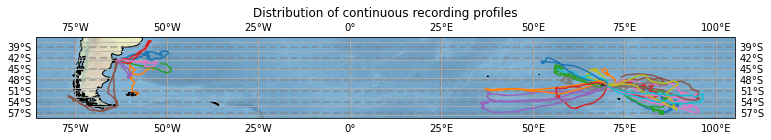

In [31]:
if 'continuous' not in list_profiles:
    list_profiles = list_profiles.merge(list_tags.set_index('SMRU_PLATFORM_CODE').continuous,on='SMRU_PLATFORM_CODE')
list_profiles_continuous = list_profiles.loc[list_profiles.continuous==1,:]

meop_plot_data.plot_map_deployments(list_profiles_continuous,
                          groupby='SMRU_PLATFORM_CODE',
                          title=f'Distribution of continuous recording profiles',
                          legend=False,
                          namefig='Global_distribution_SMS.png',
                          folder=meop_filenames.processdir,
                         )

/media/disk2/roquet/MEOP_process/python/meop_plot_data.py:251: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


(<Figure size 720x720 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f8e08911f10>)

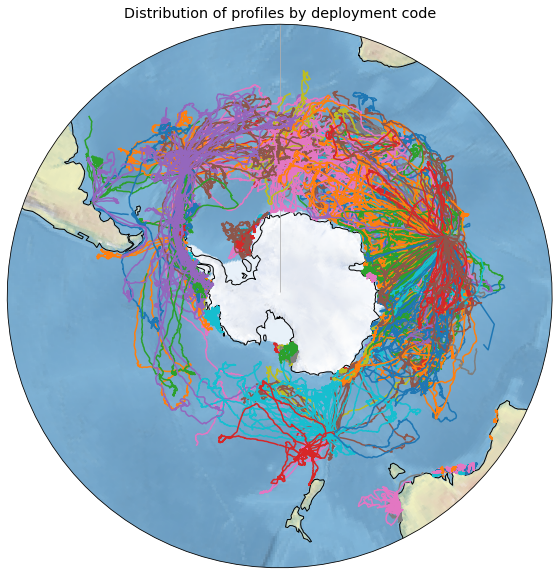

In [25]:
meop_plot_data.plot_map_stereo_south(lprofiles,
                          groupby='DEPLOYMENT_CODE',
                          title=f'Distribution of profiles by deployment code',
                          legend=False,
                          namefig=meop_filenames.processdir / 'Global_distribution_CTD_Southern_Ocean',
                         )

(<Figure size 720x720 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fade069d150>)

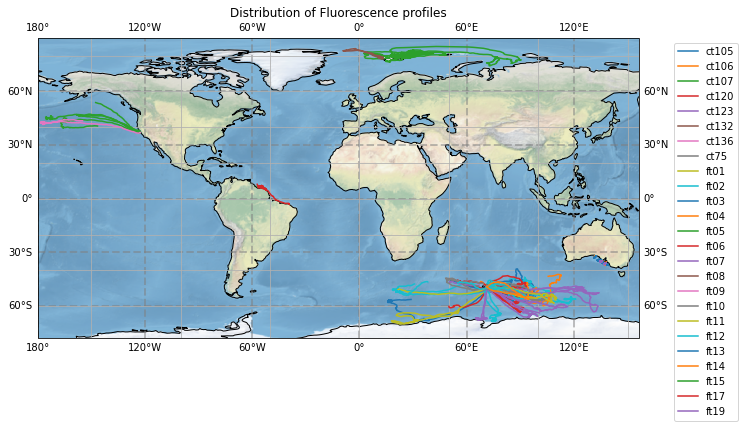

In [34]:
meop_plot_data.plot_map_deployments(list_profiles[list_profiles.N_CHLA>0],
                                    groupby='DEPLOYMENT_CODE',
                                    title='Distribution of Fluorescence profiles',
                                    namefig=meop_filenames.processdir / 'global_map_chla_profiles.png'
                                   )

(<Figure size 720x720 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9f2ef15310>)

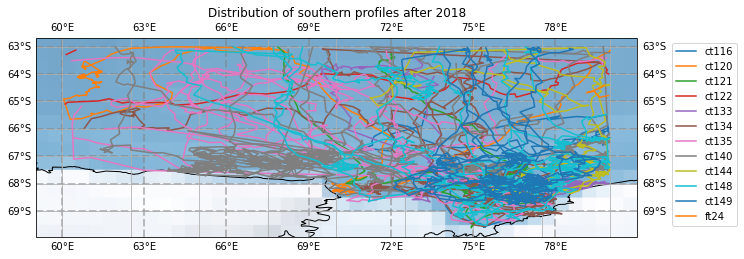

In [37]:
selection = (list_profiles.JULD.apply(lambda x: x.year)>2015) & (list_profiles.LATITUDE<-63) \
     & (list_profiles.LONGITUDE>60)  & (list_profiles.LONGITUDE<80)
meop_plot_data.plot_map_deployments(list_profiles[selection],
                                    groupby='DEPLOYMENT_CODE',
                                    title='Distribution of southern profiles after 2018',
                                    namefig=meop_filenames.processdir / 'global_map_profiles_post2018.png'
                                   )